# 1. Importación de los paquetes necesarios

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Análisis exploratorio de los datos

### 2.1 Overview del dataset

In [2]:
#Leemos el archivo csv con los datos y mostramos las 5 primeras instancias. Transponemos el dataframe para poder ver todos los atributos:
df = pd.read_csv("hotel_bookings.csv")
df.head().transpose()

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [3]:
#Calculamos las dimensiones de nuestro dataset:
print('Nuestro dataset tiene', df.shape[0],'instancias con', df.shape[1],'atributos.')

Nuestro dataset tiene 119390 instancias con 32 atributos.


In [4]:
#Comprobamos de qué tipo es cada atributo:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
#Vemos que tenemos dos tipos de hoteles: City Hotel and Resort Hotel. Nosotros solo trabajaremos con uno. Queremos usar el que tenga más datos
a= df[df["hotel"]=="City Hotel"].shape
b= df[df["hotel"]=="Resort Hotel"].shape
print('Tenemos', a[0],'instancias con el City Hotel. Y tenemos',b[0], 'instancias con el Resort Hotel.')

Tenemos 79330 instancias con el City Hotel. Y tenemos 40060 instancias con el Resort Hotel.


Vamos a trabajar con los datos de unicamente del City Resort.

A continuación crearemos un nuevo dataset que acabará siendo la versión limpia del dataset inicial, y posteriormente miraremos la distribución de cada uno de los atributos con valores vacíos.

In [6]:
df_clean = df.copy()

In [7]:
df_clean=df_clean[df_clean["hotel"]=="City Hotel"]

In [8]:
#Miramos algunos valores de estadística descriptiva:
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,79330.0,0.417270,0.493111,0.0,0.0,0.0,1.0,1.0
lead_time,79330.0,109.735724,110.948526,0.0,23.0,74.0,163.0,629.0
arrival_date_year,79330.0,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,79330.0,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
arrival_date_day_of_month,79330.0,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,79330.0,0.795185,0.885026,0.0,0.0,1.0,2.0,16.0
stays_in_week_nights,79330.0,2.182957,1.456416,0.0,1.0,2.0,3.0,41.0
adults,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
children,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
babies,79330.0,0.004941,0.084323,0.0,0.0,0.0,0.0,10.0


### 2.2 Valores vacíos 

Observando la columna *count* de la tabla anterior podemos ver fácilmente que tenemos atributos con valores vacíos. Vamos a analizar esto en detalle.

In [9]:
#Creamos un dataframe con los valores vacíos de cada variable en valor absoluto y relativo:
missing_data = pd.DataFrame([df_clean.isnull().sum(),df_clean.isnull().sum()*100.0/df_clean.shape[0]]).transpose()
missing_data.columns = ['# Valores nulos', '% Valores nulos']
missing_data

,# Valores nulos,% Valores nulos
hotel,0.0,0.000000
is_canceled,0.0,0.000000
lead_time,0.0,0.000000
arrival_date_year,0.0,0.000000
arrival_date_month,0.0,0.000000
arrival_date_week_number,0.0,0.000000
arrival_date_day_of_month,0.0,0.000000
stays_in_weekend_nights,0.0,0.000000
stays_in_week_nights,0.0,0.000000
adults,0.0,0.000000


Una vez vistos los datos, se obtara por eliminar la categoria Company (ya que solo hay 5% de instancias con este dato) y eliminar las instancias que tengan valores nulos en country,children y agent. El dataset se nos reducira de tamaño solo un 10% y pasaramos a tener un data set sin valores nulos

In [10]:
df_clean.drop(['company'], axis = 1, inplace = True)
df_clean.dropna(subset = ["children"], inplace=True)
df_clean.dropna(subset = ["country"], inplace=True)
df_clean.dropna(subset = ["agent"], inplace=True)
print('Nuestro dataset tiene ahora', df_clean.shape[0],'instancias con', df_clean.shape[1],'atributos.')

Nuestro dataset tiene ahora 71181 instancias con 31 atributos.


Verificamos que ya no tenemos ningun valor nulo

In [11]:
#Usamos el mismo dataframe que hemos creado anteriormente:
missing_data_clean = pd.DataFrame([df_clean.isnull().sum(),df_clean.isnull().sum()*100.0/df_clean.shape[0]]).transpose()
missing_data_clean.columns = ['# Valores nulos', '% Valores nulos']
missing_data_clean

,# Valores nulos,% Valores nulos
hotel,0.0,0.0
is_canceled,0.0,0.0
lead_time,0.0,0.0
arrival_date_year,0.0,0.0
arrival_date_month,0.0,0.0
arrival_date_week_number,0.0,0.0
arrival_date_day_of_month,0.0,0.0
stays_in_weekend_nights,0.0,0.0
stays_in_week_nights,0.0,0.0
adults,0.0,0.0


### 2.3 Limpieza: Otros

##### 2.3.1 Atributo meal

Si miramos los valores que toma la variable *meal* en nuestro dataset, podemos ver que son 'BB', 'FB', 'HB', 'SC y 'Undefined'. 'BB' significa *bed and breakfast*, 'FB' *full board* (desayuno, comida y cena), y 'HB' *half board* (desayuno y comida o cena), mientras que 'SC' significa no definido, lo mismo que 'Undefined'. Esto nos puede traer problemas en el futuro, así que sustituiremos todos los valores 'Undefined' por 'SC'.

In [12]:
df_clean["meal"].replace("Undefined", "SC", inplace = True)

##### 2.3.2 Atributo *adults*

Otro asunto que llama la atención es que los tres atributos referentes a los huéspedes (*adults, children y babies*) pueden tomar valor 0, la cual cosa es un tanto extraña en el caso de los adultos, ya que no tiene mucho sentido tener una reserva con sólo niños y/o bebés sin supervisión alguna, mientras que sí se podría dar el caso contrario (adultos sin niños ni bebés). Por este motivo eliminaremos todas las instancias de nuestro dataset que tengan valor 0 en el atributo *adults*.

In [13]:
adults_null = df_clean[(df_clean.adults == 0)].shape[0]
print('Tenemos',adults_null,'instancias con atributo adults = 0')

Tenemos 322 instancias con atributo adults = 0


In [14]:
#Eliminamos las instancias:
df_clean.drop(df_clean[(df_clean.adults == 0)].index, inplace = True)

##### 2.3.3 Atributos stays_in_week_nights & stays_in_weekend_nights

Evidentemente estos atributos pueden tomar el valor 0, pero lo que no tiene mucho sentido es que ambos tomen el valor 0 de forma simultánea, ya que se trataría de una reserva sin número de noches. Por ese motivo eliminaremos todas las instancias que tengan valor 0 en ambos.

In [15]:
stays_null = df_clean[(df_clean.stays_in_weekend_nights == 0) & (df_clean.stays_in_week_nights == 0)].shape[0]
print('Tenemos',stays_null,'instancias con atributos stays_in_week_nights & stays_in_weekend_nights = 0')

Tenemos 186 instancias con atributos stays_in_week_nights & stays_in_weekend_nights = 0


In [16]:
#Eliminamos las instancias:
df_clean.drop(df_clean[(df_clean.stays_in_weekend_nights == 0) & (df_clean.stays_in_week_nights == 0)].index, inplace = True)

##### 2.3.4 Atributo adr

A modo de recordatorio es adecuado que el atributo *adr* significa *average daily rate*, es decir, la tarifa diaria promedio de cada reserva. Hemos visto que hay instancias con valor *adr* = 0, la cual cosa tampoco tiene mucho sentido. En consecuencia eliminaremos todas las instancias que tengan valor 0 para este atributo.

In [17]:
adr_null = df_clean[(df_clean.adr == 0)].shape[0]
print('Tenemos',adr_null,'instancias con atributo adr = 0')

Tenemos 323 instancias con atributo adr = 0


In [18]:
#Eliminamos las instancias:
df_clean.drop(df_clean[(df_clean.adr == 0)].index, inplace = True)

En el atributo adr hemos encontrado un valor que era extrañamente anomalo:

Text(0.5, 0, 'Reserva cancelada o no')

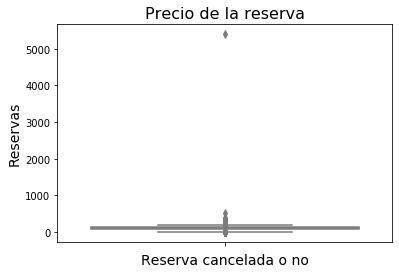

In [19]:
a = sns.boxplot( y="adr", data=df_clean, palette="pastel")
a.set_title('Precio de la reserva', fontsize=16)
a.set_ylabel('Reservas', fontsize= 14)
a.set_xlabel('Reserva cancelada o no', fontsize= 14)

Vemos claramente que hay una reserva que tiene un precio exageradamente elevado. Vamos a identificarlo:

In [20]:
df_clean[df_clean["adr"] > 1000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,1,Non Refund,12.0,0,Transient,5400.0,0,0,Canceled,2016-02-19


El precio por noche es exagerado, más de 5000. Procedemos a eliminar este outlier.

In [21]:
df_clean.shape

(70350, 31)

In [22]:
df_clean.drop(df_clean[(df_clean["adr"] > 1000)].index, inplace = True)

In [23]:
df_clean.shape

(70349, 31)

#### 2.3.5 El atributo *reservation_status*

Analizando el dataset y sus diferentes atributos hemos visto que hay un atributo que nos proporciona la misma información que la variable respuesta *is_canceled*. Se trata del atributo *reservation_status*, que nos indica si una reserva ha sido cancelada, si se hizo el *check out*, o si los huéspedes no se presentaron (*no show*). De esta manera, al estar proporcionándonos la misma información que la variable respuesta debemos eliminarla de nuestro dataset, ya que sino sufriríamos problemas de *data leakage*, que se produce cuando se usa información de fuera del set de training  para crear el modelo. Si no la eliminásemos acabaríamos creando modelos demasiado optimistas que acabarían siendo prácticamente inútiles en la realidad.

In [24]:
#Hacemos una copia del dataset conteniendo la variable porque la usaremos para análisis de datos en un punto más avanzado del notebook
df_clean_aux = df_clean.copy()
#Eliminamos la variable:
df_clean.drop(["reservation_status"], axis = 1, inplace = True)


#### 2.3.6 El atributo *hotel*

Al haber filtrado por el City Hotel, el atributo hotel nos sobra. Lo eliminamos.

In [25]:
df_clean.drop(["hotel"], axis = 1, inplace = True)

#### 2.3.7 El atributo *'booking_changes'*

El atributo booking_changes lo eliminaremos ya que nuestro modelo se usaría cuando se realizase una reserva, y este atributo cambia en el tiempo, por lo que no nos aportarían información útil al recibir la reserva.

In [26]:
df_clean.drop(["booking_changes"], axis = 1, inplace = True)

#### 2.3.8 El atributo *'days_in_waiting_list'*

El atributo days_in_waiting_list lo eliminaremos ya que nuestro modelo se usaría cuando se realizase una reserva, y este atributo cambia en el tiempo, por lo que no nos aportarían información útil al recibir la reserva.

In [27]:
df_clean.drop(["days_in_waiting_list"], axis = 1, inplace = True)

In [28]:
df_clean.shape

(70349, 27)

#### 2.3.8 El atributo *'arrival_date_year'*

El atributo arrival_date_year tambien lo eliminaremos ya que los años pasados no se repetirán y por lo tanto tampoco nos aporta información relevante.

In [29]:
df_clean.drop(["arrival_date_year"], axis = 1, inplace = True)

In [30]:
df_clean.shape

(70349, 26)

#### 2.3.9 El atributo *'assigned_room_type'*

Es un atributo que es dependiente del tiempo, y en consecuencia irían cambiando con su paso. Ademas, no tendriamos información de este atributo una vez recibimos una reserva. Ya que la habitacións se asignara cuando queden escasos dias para la llegada dle cliente.

In [31]:
df_clean.drop(["assigned_room_type"], axis = 1, inplace = True)

In [32]:
df_clean.shape

(70349, 25)

#### 2.3.10 El atributo *'deposit_type'*

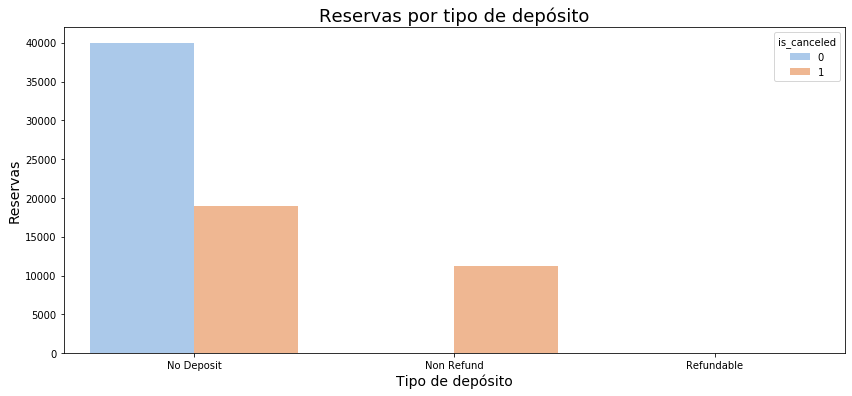

In [33]:
plt.figure(figsize=(14,6))
sns.countplot(x= 'deposit_type',data = df_clean ,hue = 'is_canceled', palette = 'pastel')
plt.title ('Reservas por tipo de depósito', fontsize = 18)
plt.xlabel('Tipo de depósito', fontsize = 14)
plt.ylabel('Reservas', fontsize = 14)
plt.show()

Podemos ver que aproximadamente 20000 reservas sin depósito fueron canceladas, una cantidad realmente significativa que implicaría grandes pérdidas.

Sorprendentemente los depósitos no reembolsables tuvieron más cancelaciones que los reembolsables, ya que lo más lógico sería asumir el suceso contrario. Para ver este suceso más en detalle mostraremos un gráfico que sólo refleje las reservas canceladas para cada tipo de depósito.

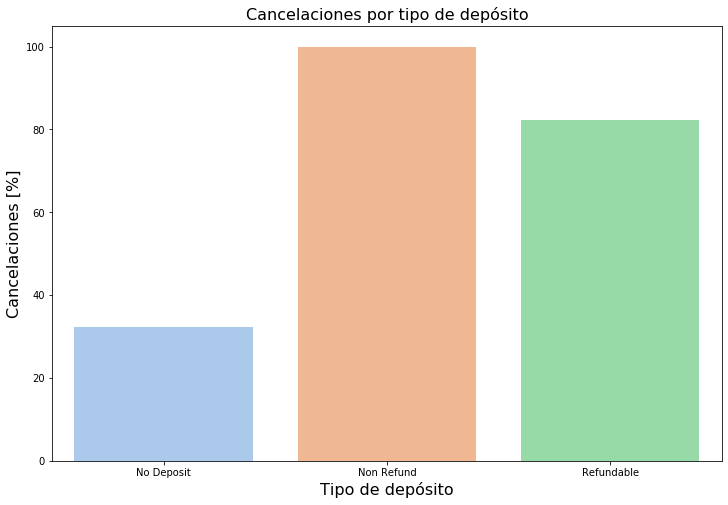

In [34]:
#Creamos un dataset agrupando la información del tipo de depósito de las reservas canceladas:
deposit_cancel_data = df_clean.groupby("deposit_type")["is_canceled"].describe()

#En este caso podemos usar la media para representar el % de cancelaciones:
plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_cancel_data.index, y=deposit_cancel_data["mean"]*100, palette = 'pastel')
plt.title("Cancelaciones por tipo de depósito", fontsize=16)
plt.xlabel("Tipo de depósito", fontsize=16)
plt.ylabel("Cancelaciones [%]", fontsize=16)
plt.show()

Podemos ver que prácticamente la totalidad de las reservas con depósito no reembolsable fueron canceladas, la cual cosa no tiene sentido y nos lleva a preguntarnos si hay algún tipo de error en los datos. Como está muy claro que esto no tiene mucho sentido procederemos a eliminar este atributo de nuestro dataset.

In [35]:
df_clean.drop(["deposit_type"], axis = 1, inplace = True)

In [36]:
df_clean.shape

(70349, 24)

#### 2.3.11 El atributo *'reservation_status_date'*

Otro atributo que podría darnos problemas es reservation_status_date, ya que al tratarse de una fecha éste toma muchísimos valores. Este valor nos marca en que fecha se actualizdo el "reservation_status" como es una medida que va cambiando con el tiempo y que no tendremos cuando la reserva llegue al hotel, la eliminamos de nuestro dataset.

In [37]:
df_clean.drop(["reservation_status_date"], axis = 1, inplace = True)

In [38]:
df_clean.shape

(70349, 23)

Comprobamos como ha quedado el dataset tras las modificaciones que se han aplicado.

In [39]:
print('Nuestro dataset tiene', df_clean.shape[0],'instancias con', df_clean.shape[1],'atributos.')

Nuestro dataset tiene 70349 instancias con 23 atributos.


### 2.4 Análisis de la correlación

En este apartado analizaremos la correlación de las diferentes variables de nuestro dataset. Primero separaremos nuestro dataset en variables numéricas y categóricas:

In [40]:
numeric_data = df_clean.select_dtypes(include=[np.number]).copy()
numeric_data.drop(["is_canceled"], axis = 1, inplace = True)
categorical_data = df_clean.select_dtypes(exclude=[np.number]).copy()

#### 2.6.1 Correlación de las variables numéricas

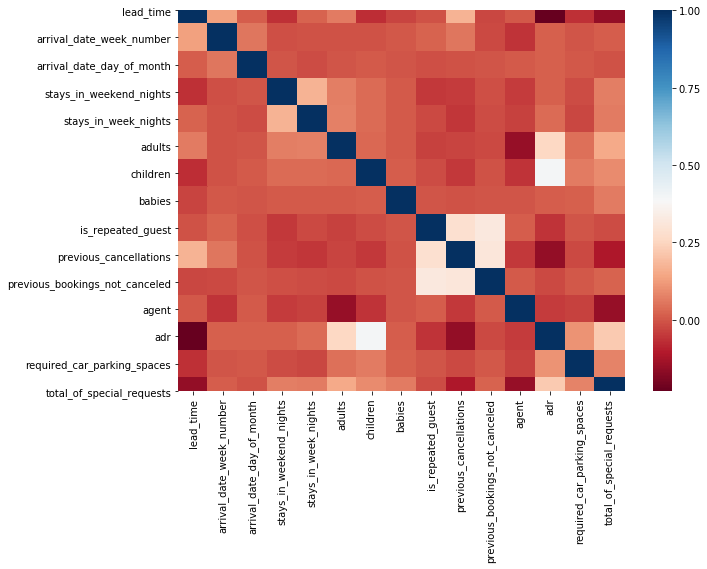

In [41]:
#Calculamos la matriz de correlación:
fig,axes = plt.subplots(1,1,figsize=(10,7))
sns.heatmap(numeric_data.corr(),cmap="RdBu")
plt.show()

A continuación mostraremos la correlación de las variables numéricas con la variable respuesta *is_canceled*:

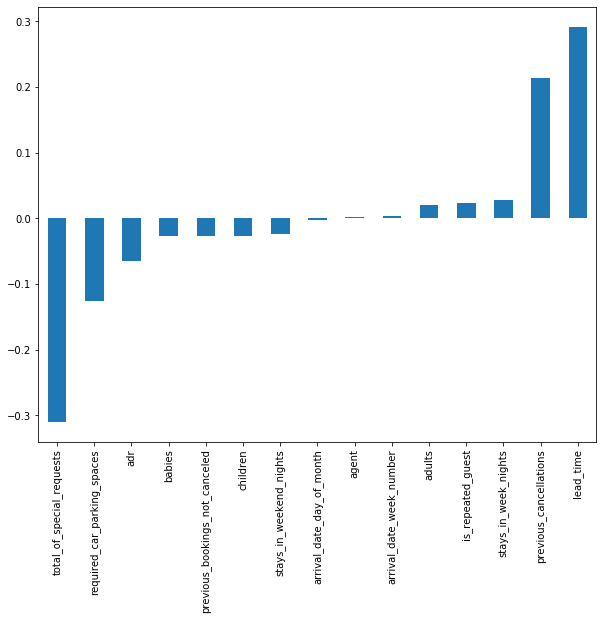

In [42]:
#Lo mostramos gráficamente:
plt.figure(figsize=(10,8))
df_clean.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')
plt.show()

In [43]:
#También en forma de lista:
df_clean.corr()['is_canceled'].sort_values(ascending=False)[1:]

lead_time                         0.292038
previous_cancellations            0.213804
stays_in_week_nights              0.027732
is_repeated_guest                 0.024057
adults                            0.020956
arrival_date_week_number          0.003669
agent                             0.002335
arrival_date_day_of_month        -0.003230
stays_in_weekend_nights          -0.024471
children                         -0.026491
previous_bookings_not_canceled   -0.027229
babies                           -0.027540
adr                              -0.064697
required_car_parking_spaces      -0.126606
total_of_special_requests        -0.310352
Name: is_canceled, dtype: float64

Podemos ver que las variables numéricas más correlacionadas con la variable respuesta son lead_time, previous cancellations, total_of_special_requestsy  required_car_parking_spaces.

In [46]:
df_clean.groupby("is_canceled").mean()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,,,,,,,,,,,,,,,
0,88.710265,27.258867,15.862781,0.843535,2.205204,1.895848,0.098553,0.006499,0.006099,0.007698,0.020870,28.024170,109.739788,0.036842,0.779000
1,155.094364,27.356493,15.805702,0.800000,2.284245,1.915689,0.078972,0.001879,0.010415,0.160580,0.000626,28.290178,104.850248,0.000000,0.287508


In [57]:
df_clean.columns.tolist()

['is_canceled',
 'lead_time',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'agent',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [56]:
len(df_clean.columns.tolist())

23

In [61]:
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,70349.0,0.431278,0.495258,0.0,0.0,0.0,1.0,1.0
lead_time,70349.0,117.340289,112.578685,0.0,30.0,83.0,173.0,629.0
arrival_date_week_number,70349.0,27.300971,13.177260,1.0,17.0,27.0,38.0,53.0
arrival_date_day_of_month,70349.0,15.838164,8.751046,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,70349.0,0.824759,0.881099,0.0,0.0,1.0,2.0,10.0
stays_in_week_nights,70349.0,2.239293,1.411596,0.0,1.0,2.0,3.0,22.0
adults,70349.0,1.904405,0.468883,1.0,2.0,2.0,2.0,4.0
children,70349.0,0.090108,0.366083,0.0,0.0,0.0,0.0,3.0
babies,70349.0,0.004506,0.083081,0.0,0.0,0.0,0.0,10.0
is_repeated_guest,70349.0,0.007960,0.088865,0.0,0.0,0.0,0.0,1.0
